# Web Scraping Reddit Using Praw Package and Reddit apps API

In [22]:
import praw
import csv
from datetime import datetime

# Initialize PRAW with your Reddit app credentials
reddit = praw.Reddit(
    client_id="arr32sSYSTUkkgugEdShVQ",
    client_secret="moz5DTxGYrDBXlO496uJmZKH2bB80w",
    user_agent="Wise Shopper",
)

def convert_timestamp(timestamp):
    return datetime.utcfromtimestamp(timestamp)

# Define a function to write data to a CSV file
def write_to_csv(csv_file_path, data, fieldnames):
    with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# Specify the URLs of the posts you want to scrape
post_urls = [
    'https://www.reddit.com/r/LinusTechTips/comments/17synze/is_ryzen_7_7800x3d_really_that_good/',
    'https://www.reddit.com/r/Amd/comments/18f5j13/ryzen_7_7800x3d_is_the_goat/',
    'https://www.reddit.com/r/buildapc/comments/12clszu/amd_ryzen_7_7800x3d_review_megathread/',
    'https://www.reddit.com/r/Amd/comments/18ogzwt/amd_ryzen_7_7800x3d_vs_intel_core_i914900k/',
    'https://www.reddit.com/r/Amd/comments/13kdel9/ryzen_7_7800x3d_is_it_worth_the_risk/',
    'https://www.reddit.com/r/buildapcsales/comments/17qfp96/cpu_amd_ryzen_7_7800x3d_299_microcenter_instore/',
    'https://www.reddit.com/r/buildapc/comments/17z7m6j/get_ryzen_7_7800x3d_or_wait_for_next_gen/',
    'https://www.reddit.com/r/buildapc/comments/1ae09h8/regarding_the_ryzen_7800x3d_performances_overall/',
    'https://www.reddit.com/r/hardware/comments/12hth3b/amd_ryzen_7_7800x3d_meta_review/',
    'https://www.reddit.com/r/buildmeapc/comments/18oczer/is_amd_ryzen_7_7800x3d_cpu_bad/',
    'https://www.reddit.com/r/buildapcsales/comments/108alzt/cpu_intel_core_i513400f_20999_w_intel_screwdriver/',
    'https://www.reddit.com/r/intel/comments/17kxa0n/is_intel_i513400f_worth_it_over_i713700f_for_212/',
    'https://www.reddit.com/r/buildmeapc/comments/152zq1a/opinions_on_this_intel_core_i5_13400fasus_geforce/',
    'https://www.reddit.com/r/buildapcsales/comments/12vf1z0/cpu_intel_core_i513400f_17999_ebay_antonline/',
    'https://www.reddit.com/r/hardware/comments/10fb1vr/intel_core_i513400f_cpu_review_mainstream_magic/',
    'https://www.reddit.com/r/buildapc/comments/158p2k9/intel_core_i5_13400f_or_i5_12600k/',
    'https://www.reddit.com/r/intel/comments/16cd6mw/i513400f_with_ddr5_5200mhz/',
    'https://www.reddit.com/r/buildapc/comments/16h1wpo/is_the_i5_13400f_too_weak_for_a_rtx_4070/',
    'https://www.reddit.com/r/hardware/comments/11kimn9/tpu_intel_core_i513400f_review_force_of_efficiency/',
    'https://www.reddit.com/r/intel/comments/11k99ga/ddr5_6000mts_with_i513400f/',
    'https://www.reddit.com/r/buildapcsales/comments/101l3xj/cpu_intel_core_i513600k_unlocked_desktop/',
    'https://www.reddit.com/r/intel/comments/17r6078/i5_13600k_is_legendary/',
    'https://www.reddit.com/r/intel/comments/ydey15/how_good_is_the_i5_13600k/',
    'https://www.reddit.com/r/buildapcsales/comments/yikjeu/cpu_intel_core_i5_13600k_300_amazon/',
    'https://www.reddit.com/r/PcBuildHelp/comments/1aogptw/is_intel_core_i513600k_good_for_1440p/',
    'https://www.reddit.com/r/buildapc/comments/16q0s7a/intel_core_i713700k_vs_i513600k_is_the_i7_ever/',
    'https://www.reddit.com/r/intel/comments/wabz37/intel_core_i713700k_and_core_i513600k_tested/',
    'https://www.reddit.com/r/intel/comments/w4evou/intel_core_i513600k_14core_cpu_is_almost_as_fast/',
    'https://www.reddit.com/r/PcBuildHelp/comments/14uvimg/i5_13600k_vs_i712700f_for_video_editing_graphic/',
    'https://www.reddit.com/r/buildapcsales/comments/yi1vhd/cpu_intel_core_i513600k_13th_gen_300_bestbuy/',
    'https://www.reddit.com/r/technology/comments/16a2bjv/amazon_customer_discovers_his_intel_core_i913900k/',
    'https://www.reddit.com/r/buildapc/comments/1al5cv9/intel_core_i913900k_running_hot_in_games/',
    'https://www.reddit.com/r/buildapc/comments/14rceeq/core_i713700k_vs_intel_core_i913900k/',
    'https://www.reddit.com/r/hardware/comments/w199el/intel_core_i913900k_engineering_sample_tested_in/',
    'https://www.reddit.com/r/buildapc/comments/11gbhqb/buy_intel_i9_13900k_or_wait_for_amd_ryzen_9/',
    'https://www.reddit.com/r/edmproduction/comments/15or22q/does_anyone_here_have_an_i9_13900k_cpu/',
    'https://www.reddit.com/r/intel/comments/vyasdk/intel_core_i913900k_preproduction_sample_tested/',
    'https://www.reddit.com/r/buildapc/comments/16oat24/which_cpu_is_better_intel_core_i913900k_or_amd/',
    'https://www.reddit.com/r/hardware/comments/rzv4b1/intels_13th_gen_core_i913900k_will_pack_24_cores/',
    'https://www.reddit.com/r/Amd/comments/xpo1mr/intel_i9_13900k_vs_amd_gaming_benchmarks_in_an/',
    'https://www.reddit.com/r/Amd/comments/xoj3lm/95c_is_now_normal_amd_ryzen_9_7950x_cpu_review/',
    'https://www.reddit.com/r/buildapc/comments/13t1mpf/honest_advice_ryzen_7950x_if_i_knew_how_good_it/',
    'https://www.reddit.com/r/Amd/comments/z3h030/amd_ryzen_9_7950x_gets_even_cheaper_now_drops_to/',
    'https://www.reddit.com/r/Amd/comments/1330u8m/my_first_build_using_amd_ryzen_9_7950x_and_radeon/',
    'https://www.reddit.com/r/buildapc/comments/xvqypu/does_buying_the_amd_ryzen_9_7950x_make_sense/',
    'https://www.reddit.com/r/buildapc/comments/174j3hs/which_should_i_buy_ryzen_9_7950x_vs_ryzen_9/',
    'https://www.reddit.com/r/gadgets/comments/xl0vvm/amd_ryzen_9_7950x_gets_overclocked_to_72ghz_with/',
    'https://www.reddit.com/r/Amd/comments/xfb0ov/amd_ryzen_9_7950x_boosts_to_585_ghz_only_if_you/',
    'https://www.reddit.com/r/hardware/comments/xp2mxd/ryzen_9_7950x_power_consumption_eco_mode_tests/',
    'https://www.reddit.com/r/ryzen/comments/1897oim/questions_for_all_ryzen9_7950x_users/',
    'https://www.reddit.com/r/buildapc/comments/ytdsph/ryzen_7_5800x3d_worth_it/',
    'https://www.reddit.com/r/buildapc/comments/18wxo7z/is_the_ryzen_7_5800x3d_still_a_good_processor_in/',
    'https://www.reddit.com/r/buildapc/comments/190gezb/amd_ryzen_7_5800x3d_or_higher/',
    'https://www.reddit.com/r/hardware/comments/u5ixa7/amd_ryzen_7_5800x3d_meta_review/',
    'https://www.reddit.com/r/Amd/comments/u25wbf/amd_ryzen_7_5800x3d_review_the_magic_of_3d_vcache/',
    'https://www.reddit.com/r/hardware/comments/u25loj/tpu_amd_ryzen_7_5800x3d_review_the_magic_of_3d/',
    'https://www.reddit.com/r/Amd/comments/1aiakip/new_amd_ryzen_7_5700x3d_cpu_review_benchmarks_vs/',
    'https://www.reddit.com/r/intel/comments/u2ac8z/amd_ryzen_7_5800x3d_review_the_magic_of_3d_vcache/',
    'https://www.reddit.com/r/Amd/comments/11bk9lz/ryzen_7_5800x3d/',
    'https://www.reddit.com/r/Amd/comments/tg5v1l/its_official_amd_ryzen_7_5800x3d_does_not_support/',
    'https://www.reddit.com/r/Amd/comments/1adws8c/new_budget_gpu_looks_like_a_cpu_amd_ryzen_7_8700g/',
    'https://www.reddit.com/r/hardware/comments/19doal6/the_latest_amd_ryzen_7_8700g_and_ryzen_5_8600g/',
    'https://www.reddit.com/r/Amd/comments/1adz896/amd_ryzen_7_8700g_review_most_powerful_integrated/',
    'https://www.reddit.com/r/AMDHelp/comments/193rrwy/ryzen_7_8700g_vs_ryzen_9_7950x3d_for_gaming/',
    'https://www.reddit.com/r/hardware/comments/1adwsqk/new_budget_gpu_looks_like_a_cpu_amd_ryzen_7_8700g/',
    'https://www.reddit.com/r/Amd/comments/1aeumf5/amd_ryzen_7_8700g_review_1080pcapable_gaming/',
    'https://www.reddit.com/r/bapcsalescanada/comments/1adzb6w/cpu_amd_ryzen_7_8700g_470_various_retailers/',
    'https://www.reddit.com/r/Amd/comments/18nzokk/amd_ryzen_7_8700g_hawk_point_am5_desktop_apu/',
    'https://www.reddit.com/r/linux/comments/1adw94p/amd_ryzen_7_8700g_linux_performance_review/',
    'https://www.reddit.com/r/Amd/comments/1aeiipp/amd_ryzen_7_8700g_and_ryzen_5_8600g_review/',
    'https://www.reddit.com/r/Amd/comments/xoiznr/amd_ryzen_5_7600x_review_54ghz_easy/',
    'https://www.reddit.com/r/buildapc/comments/13ad9kh/is_the_ryzen_5_7600x_worth/',
    'https://www.reddit.com/r/Amd/comments/zqzlj7/intelamd_cpu_price_war_continues_amd_ryzen_5/',
    'https://www.reddit.com/r/Amd/comments/xoing5/amd_ryzen_5_7600x_review_benchmarks_gaming_beast/',
    'https://www.reddit.com/r/Amd/comments/x1kmd8/amd_ryzen_5_7600x_has_already_been_tested_with/',
    'https://www.reddit.com/r/AMDHelp/comments/1ais528/how_strong_is_a_ryzen_5_7600x/',
    'https://www.reddit.com/r/pcmasterrace/comments/18f20vi/amd_ryzen_5_7600_vs_7600x_which_one_i_should_get/',
    'https://www.reddit.com/r/Amd/comments/x9vrz0/amd_ryzen_5_7600x_tested_in_cinebench_r23_with/',
    'https://www.reddit.com/r/Amd/comments/xotvcu/amds_value_problem_ryzen_5_7600x_cpu_review/',
    'https://www.reddit.com/r/Amd/comments/xjanl4/amd_ryzen_5_7600x_over_50_faster_than_the_5600x/',
    'https://www.reddit.com/r/buildapc/comments/10e4fnl/is_ryzen_5_5600x_still_worth_it/',
    'https://www.reddit.com/r/pcmasterrace/comments/q3uaza/ryzen_5_5600x_rtx_3080_op/',
    'https://www.reddit.com/r/buildapc/comments/185obem/is_a_ryzen_5_5600x_good_for_gaming_in_2023_and_a/',
    'https://www.reddit.com/r/buildapc/comments/qvye48/amd_ryzen_5_5600x_decent_for_a_3060ti/',
    'https://www.reddit.com/r/buildapcsales/comments/oku1lf/cpu_amd_ryzen_5_5600x_6core_12threads_27999/',
    'https://www.reddit.com/r/Amd/comments/zuvct5/amd_ryzen_5_5600x_is_four_times_as_popular_as/',
    'https://www.reddit.com/r/buildapcsales/comments/mo76o6/cpu_amd_ryzen_5_5600x_29900/',
    'https://www.reddit.com/r/buildapc/comments/15r5mq1/how_futureproof_is_the_amd_ryzen_5_5600x_for/',
    'https://www.reddit.com/r/buildapcsales/comments/seru6s/cpu_amd_ryzen_5_5600x_microcenter_in_store_only/',
    'https://www.reddit.com/r/buildapcsales/comments/lfzc3h/cpu_amd_ryzen_5_5600x_6core12thread_desktop/',
    'https://www.reddit.com/r/nvidia/comments/y18mw3/hwub_geforce_rtx_4090_review_nvidias_stupid_fast/',
    'https://www.reddit.com/r/hardware/comments/xwxxlx/nvidia_geforce_rtx_4090_where_the_misconception/',
    'https://www.reddit.com/r/technology/comments/t9gp5g/nvidias_geforce_rtx_4090_may_be_twice_as_fast_as/',
    'https://www.reddit.com/r/nvidia/comments/z2nytz/nvidia_geforce_rtx_4090_is_outselling_the_rtx/',
    'https://www.reddit.com/r/nvidia/comments/zheepi/gigabyte_geforce_rtx_4090_windforce_3_24g/',
    'https://www.reddit.com/r/nvidia/comments/y18liw/gamers_nexus_nvidia_geforce_rtx_4090_founders/',
    'https://www.reddit.com/r/hardware/comments/y5h1hf/nvidia_geforce_rtx_4090_meta_review/',
    'https://www.reddit.com/r/nvidia/comments/y18ixt/nvidia_geforce_rtx_4090_founders_edition_review/',
    'https://www.reddit.com/r/hardware/comments/y17jrj/nvidia_rtx_4090_fe_review_megathread/',
    'https://www.reddit.com/r/nvidia/comments/10ls9ma/gigabyte_aorus_master_rtx_4090_review/',
    'https://www.reddit.com/r/Amd/comments/zjzws8/amd_radeon_rx_7900_xtx_review_gpu_benchmarks/',
    'https://www.reddit.com/r/Amd/comments/zjzris/amd_radeon_rx_7900_xtxxt_review_roundup/',
    'https://www.reddit.com/r/Amd/comments/zjzzi5/hub_radeon_rx_7900_xtx_review_benchmarks/',
    'https://www.reddit.com/r/pcgaming/comments/zk0tau/amd_radeon_rx_7900_xtx_review_gpu_benchmarks/',
    'https://www.reddit.com/r/Amd/comments/14a2c6x/powercolor_red_devil_7900_xtx_user_review/',
    'https://www.reddit.com/r/Amd/comments/117n6rc/asrock_radeon_rx_7900_xtx_taichi_review/',
    'https://www.reddit.com/r/pcmasterrace/comments/185folc/4070_ti_vs_rx_7900_xtx/',
    'https://www.reddit.com/r/hoggit/comments/19ba9z2/small_review_7900_xtx_for_flight_sims_a_great/',
    'https://www.reddit.com/r/Amd/comments/zddx2f/amd_radeon_rx_7900_xtx_has_been_tested_with/',
    'https://www.reddit.com/r/Amd/comments/10dndcs/cant_find_any_sapphire_7900_xtx_pulse_reviews/',
    'https://www.reddit.com/r/nvidia/comments/1983l3c/gamers_nexus_nvidia_geforce_rtx_4070_super_review/',
    'https://www.reddit.com/r/hardware/comments/1983kez/hardware_unboxed_nvidia_geforce_rtx_4070_super/',
    'https://www.reddit.com/r/nvidia/comments/1ahowiy/4070_super_review_for_1440p_gamers/',
    'https://www.reddit.com/r/gadgets/comments/1985ork/nvidia_geforce_rtx_4070_super_review/',
    'https://www.reddit.com/r/hardware/comments/1983l4u/gamers_nexus_nvidia_geforce_rtx_4070_super_review/',
    'https://www.reddit.com/r/hardware/comments/1983kja/techpowerup_nvidia_geforce_rtx_4070_super/',
    'https://www.reddit.com/r/nvidia/comments/191go4d/nvidia_launches_geforce_rtx_40_super_series_999/',
    'https://www.reddit.com/r/nvidia/comments/19eh7j4/is_rtx_4070_super_a_good_value_now_upgrading_from/',
    'https://www.reddit.com/r/nvidia/comments/1akykpj/4070_super_versions/',
    'https://www.reddit.com/r/nvidia/comments/1983kd1/tpu_nvidia_geforce_rtx_4070_super_founders/',
    'https://www.reddit.com/r/hardware/comments/16bjryx/amd_radeon_rx_7800_xt_review/',
    'https://www.reddit.com/r/Amd/comments/16s09xk/rx_7800_xt_review_is_it_really_this_good/',
    'https://www.reddit.com/r/pcgaming/comments/16bjufu/amd_radeon_rx_7800_xt_review/',
    'https://www.reddit.com/r/Amd/comments/16bjql2/amd_radeon_rx_7800_xt_gpu_review_benchmarks_vs_rx/',
    'https://www.reddit.com/r/Amd/comments/16bjq4i/hub_radeon_rx_7800_xt_review_amd_finally_worked/',
    'https://www.reddit.com/r/hardware/comments/16bjpi3/amd_radeon_rx_7800_xt_gpu_review_benchmarks_vs_rx/',
    'https://www.reddit.com/r/Amd/comments/16sezp4/asrock_radeon_rx_7800_xt_steel_legend_review/',
    'https://www.reddit.com/r/Amd/comments/1ad0tfb/amd_radeon_rx_7800_xt_is_now_available_for_489/',
    'https://www.reddit.com/r/radeon/comments/16crzdo/what_is_up_with_userbenchmark_website_review_of/',
    'https://www.reddit.com/r/Amd/comments/16mvgh4/asrock_rx_7800_xt_steel_legend_minireview/',
    'https://www.reddit.com/r/buildapc/comments/14e0vlc/how_good_is_a_6700_xt_in_2023/',
    'https://www.reddit.com/r/Amd/comments/m6zzpp/gn_amd_radeon_rx_6700_xt_gpu_review_literally/',
    'https://www.reddit.com/r/Amd/comments/m6zzjo/hub_amd_radeon_rx_6700_xt_review_a_worthy_5700_xt/',
    'https://www.reddit.com/r/Amd/comments/m6zxr4/radeon_rx_6700_xt_review_roundup/',
    'https://www.reddit.com/r/Amd/comments/o3djh2/powercolor_radeon_rx_6700xt_hellhound_12_gb/',
    'https://www.reddit.com/r/Amd/comments/14ck23v/sapphire_pulse_rx_6700xt_reviews/',
    'https://www.reddit.com/r/AMD_Stock/comments/m70rm3/amd_radeon_rx_6700_xt_review_impressive_1440p_pc/',
    'https://www.reddit.com/r/Amd/comments/m4aoje/amd_radeon_rx_6700_xt_slower_than_rx_5700_xt_in/',
    'https://www.reddit.com/r/realAMD/comments/m7156r/sapphire_nitro_rx_6700_xt_12g_review/',
    'https://www.reddit.com/r/buildapc/comments/xniwtw/what_are_your_thoughts_on_radeon_rx_6700_xt/',
    'https://www.reddit.com/r/nvidia/comments/13u62x8/nvidia_geforce_rtx_4060_ti_review_the/',
    'https://www.reddit.com/r/Games/comments/13ps4yj/do_not_buy_nvidia_geforce_rtx_4060_ti_8gb_gpu/',
    'https://www.reddit.com/r/hardware/comments/1530fn5/nvidia_geforce_rtx_4060_ti_16gb_reviewnot/',
    'https://www.reddit.com/r/nvidia/comments/13po3md/gamers_nexus_do_not_buy_nvidia_geforce_rtx_4060/',
    'https://www.reddit.com/r/hardware/comments/13pnx5q/do_not_buy_nvidia_geforce_rtx_4060_ti_8gb_gpu/',
    'https://www.reddit.com/r/hardware/comments/13pojwc/thank_you_nvidia_rtx_4060_ti_review/',
    'https://www.reddit.com/r/pcgaming/comments/13u602x/nvidia_geforce_rtx_4060_ti_review_the/',
    'https://www.reddit.com/r/nvidia/comments/1597epq/nvidia_geforce_rtx_4060_ti_16_gb_review_twice_the/',
    'https://www.reddit.com/r/hardware/comments/13pobuz/nvidia_geforce_rtx_4060_ti_founders_edition_review/',
    'https://www.reddit.com/r/nvidia/comments/15f11at/rtx_4060_ti_16_gb/',
    'https://www.reddit.com/r/hardware/comments/12jlngn/nvidia_geforce_rtx_4070_founders_edition_review/',
    'https://www.reddit.com/r/Games/comments/12jlijs/nvidia_geforce_rtx_4070_review_a_solid_but/',
    'https://www.reddit.com/r/hardware/comments/12oiqcd/nvidia_geforce_rtx_4070_meta_review/',
    'https://www.reddit.com/r/hardware/comments/12jlrnp/nvidia_geforce_rtx_4070_review_a_solid_but/',
    'https://www.reddit.com/r/hardware/comments/108ay99/nvidia_geforce_rtx_4070_ti_meta_review/',
    'https://www.reddit.com/r/nvidia/comments/12idk6a/nvidia_geforce_rtx_4070_matches_geforce_rtx_3080/',
    'https://www.reddit.com/r/hardware/comments/16ijkal/nvidia_geforce_rtx_4070_could_see_price_cuts_to/',
    'https://www.reddit.com/r/nvidia/comments/12pc774/damn_i_bought_a_rtx_4070_msi_ventus_x3/',
    'https://www.reddit.com/r/GamingLeaksAndRumours/comments/11s1bid/nvidia_geforce_rtx_4070_rumored_to_launch_at_749/',
    'https://www.reddit.com/r/PcBuild/comments/18xvgpj/rog_strix_geforce_rtx_4070_review/'
    # Add more post URLs as needed
]

products = [
    ("AMD Ryzen 7 7800X3D", "Processor"),
    ("Intel Core i5 13400F", "Processor"),
    ("Intel Core i5 13600K", "Processor"),
    ("Intel Core i9 13900K", "Processor"),
    ("AMD Ryzen 9 7950X", "Processor"),
    ("AMD Ryzen 7 5800X3D", "Processor"),
    ("AMD Ryzen 7 8700G", "Processor"),
    ("AMD Ryzen 5 7600x", "Processor"),
    ("AMD Ryzen 5 5600x", "Processor"),
    ("Nvidia GeForce RTX 4090", "Graphics Processing Unit"),
    ("AMD Radeon RX 7900 XTX", "Graphics Processing Unit"),
    ("Nvidia GeForce RTX 4070 Super", "Graphics Processing Unit"),
    ("AMD Radeon RX 7800 XT", "Graphics Processing Unit"),
    ("AMD Radeon RX 6700 XT", "Graphics Processing Unit"),
    ("Nvidia RTX 4060 Ti", "Graphics Processing Unit"),
    ("Nvidia GeForce RTX 4070", "Graphics Processing Unit")
]

# Create a new list to store the multiplied elements
multiplied_products = []

# Iterate through each product and multiply it by 10
for product, category in products:
    for _ in range(10):
        multiplied_products.append((product, category))

# Product information (optional, fill in with your specific product details)
# product_name = "AMD Ryzen 7 7800X3D"
# product_category = "Processor"

# Timestamp
timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Prepare lists to store post and comment data
post_data = []
comment_data = []

for post_url in post_urls:
    # Retrieve the submission object using the post URL
    submission = reddit.submission(url=post_url)
    
    product_name, product_category = multiplied_products.pop(0) if multiplied_products else ("N/A", "N/A")
    
    # Add post information to the post_data list
    post_data.append({
        'Submission ID': submission.id,
        'Post Title': submission.title,
        'Post URL': submission.url,
        'Author': submission.author.name if submission.author else "[deleted]",
        'Score': submission.score,
        'Number of Comments': submission.num_comments,
        'Upvote Ratio': submission.upvote_ratio,
        'Submission Text': submission.selftext,
        'Product Name': product_name,
        'Product Category': product_category,
        'Posting Time': convert_timestamp(submission.created_utc)
    })

    # Add comment information to the comment_data list
    for comment in submission.comments:
        if isinstance(comment, praw.models.Comment):  # Filter out MoreComments objects
            comment_data.append({
                'Comment ID': comment.id,
                'Parent ID': comment.parent_id,
                'Comment Body': comment.body,
                'Author': comment.author.name if comment.author else "[deleted]",
                'Score': comment.score,
                'Product Name': product_name,
                'Product Category': product_category,
                'Posting Time': convert_timestamp(submission.created_utc)
            })

# Write post data to a CSV file
post_csv_file_path = "post_data.csv"
write_to_csv(post_csv_file_path, post_data, fieldnames=['Submission ID', 'Post Title', 'Post URL', 'Author', 'Score', 'Number of Comments', 'Upvote Ratio', 'Submission Text', 'Product Name', 'Product Category', 'Posting Time'])
print("Post data saved to", post_csv_file_path)

# Write comment data to a CSV file
comment_csv_file_path = "comment_data.csv"
write_to_csv(comment_csv_file_path, comment_data, fieldnames=['Comment ID', 'Parent ID', 'Comment Body', 'Author', 'Score', 'Product Name', 'Product Category', 'Posting Time'])
print("Comment data saved to", comment_csv_file_path)


Post data saved to post_data.csv
Comment data saved to comment_data.csv


## Importing Libraries

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading CSVs

In [24]:
file_path_post_data ='/Users/mayureshdongare/Desktop/CU Docs/Data Mining CSCI 5502/Data Mining Project/post_data.csv'
file_path_comment_data ='/Users/mayureshdongare/Desktop/CU Docs/Data Mining CSCI 5502/Data Mining Project/comment_data.csv'

post_data = pd.read_csv(file_path_post_data)
comment_data = pd.read_csv(file_path_comment_data)

In [25]:
post_data.head()

,Submission ID,Post Title,Post URL,Author,Score,Number of Comments,Upvote Ratio,Submission Text,Product Name,Product Category,Posting Time
0,17synze,Is Ryzen 7 7800x3D really that good?,https://www.reddit.com/r/LinusTechTips/comment...,ro3rr,39,85,0.76,"I have seen that a higher cache, such as x3d, ...",AMD Ryzen 7 7800X3D,Processor,2023-11-11 17:01:47
1,18f5j13,Ryzen 7 7800X3D is the GOAT,https://www.reddit.com/r/Amd/comments/18f5j13/...,Mopar_63,530,267,0.91,I do not know what voodoo AMD did with this ch...,AMD Ryzen 7 7800X3D,Processor,2023-12-10 15:05:59
2,12clszu,AMD Ryzen 7 7800X3D review megathread,https://www.reddit.com/r/buildapc/comments/12c...,inversion_modz,471,325,0.97,Hello everybody! \n\n &nbsp; \n\nThe AMD Ry...,AMD Ryzen 7 7800X3D,Processor,2023-04-05 14:16:04
3,18ogzwt,AMD Ryzen 7 7800X3D vs. Intel Core i9-14900K,https://www.techspot.com/review/2783-ryzen-780...,Stiven_Crysis,383,339,0.95,NaN,AMD Ryzen 7 7800X3D,Processor,2023-12-22 15:06:53
4,13kdel9,Ryzen 7 7800X3D is it worth the risk???,https://www.reddit.com/r/Amd/comments/13kdel9/...,Alarmed-Bad7994,17,66,0.69,Hello!!! I am in the processing of building a ...,AMD Ryzen 7 7800X3D,Processor,2023-05-17 20:39:53


In [26]:
post_data.describe()

,Score,Number of Comments,Upvote Ratio
count,160.000000,160.000000,160.000000
mean,376.231250,216.600000,0.863375
std,623.316674,254.123038,0.118809
min,0.000000,3.000000,0.330000
25%,28.500000,46.500000,0.810000
50%,169.000000,127.000000,0.910000
75%,445.250000,300.000000,0.940000
max,5103.000000,1680.000000,1.000000


<Axes: >

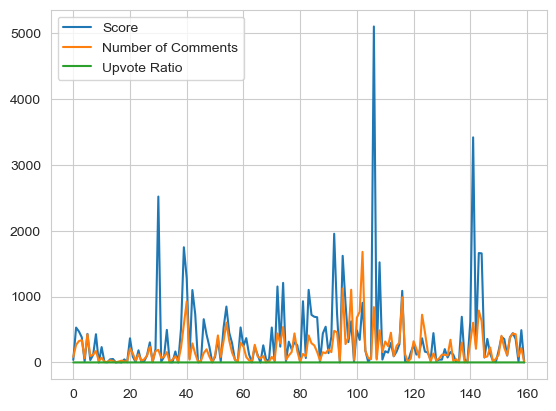

In [27]:
post_data.plot()

In [28]:
post_data.columns

Index(['Submission ID', 'Post Title', 'Post URL', 'Author', 'Score',
       'Number of Comments', 'Upvote Ratio', 'Submission Text', 'Product Name',
       'Product Category', 'Posting Time'],
      dtype='object')

In [29]:
comment_data.head()

,Comment ID,Parent ID,Comment Body,Author,Score,Product Name,Product Category,Posting Time
0,k8t258c,t3_17synze,> I have also read a blog from UserBenchmark\n...,bloodem,153,AMD Ryzen 7 7800X3D,Processor,2023-11-11 17:01:47
1,k8t248o,t3_17synze,Do not use userbenchmark it's trash and he hat...,aggressiveturdbuckle,248,AMD Ryzen 7 7800X3D,Processor,2023-11-11 17:01:47
2,k8t45x2,t3_17synze,userbenchmark is not to be trusted for their o...,Izan_TM,125,AMD Ryzen 7 7800X3D,Processor,2023-11-11 17:01:47
3,k8t98ke,t3_17synze,The person running userbenchmark seems to have...,KrisKorona,46,AMD Ryzen 7 7800X3D,Processor,2023-11-11 17:01:47
4,k8t7gd8,t3_17synze,Userbenchmark used to have fairly balanced rev...,ManyPandas,24,AMD Ryzen 7 7800X3D,Processor,2023-11-11 17:01:47


In [30]:
post_data.columns

Index(['Submission ID', 'Post Title', 'Post URL', 'Author', 'Score',
       'Number of Comments', 'Upvote Ratio', 'Submission Text', 'Product Name',
       'Product Category', 'Posting Time'],
      dtype='object')

In [31]:
comment_data.columns

Index(['Comment ID', 'Parent ID', 'Comment Body', 'Author', 'Score',
       'Product Name', 'Product Category', 'Posting Time'],
      dtype='object')

In [32]:
comment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5564 entries, 0 to 5563
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Comment ID        5564 non-null   object
 1   Parent ID         5564 non-null   object
 2   Comment Body      5564 non-null   object
 3   Author            5564 non-null   object
 4   Score             5564 non-null   int64 
 5   Product Name      5564 non-null   object
 6   Product Category  5564 non-null   object
 7   Posting Time      5564 non-null   object
dtypes: int64(1), object(7)
memory usage: 347.9+ KB


In [33]:
comment_data.describe()

,Score
count,5564.000000
mean,20.741373
std,152.116225
min,-44.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,9071.000000


In [34]:
post_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Submission ID       160 non-null    object 
 1   Post Title          160 non-null    object 
 2   Post URL            160 non-null    object 
 3   Author              160 non-null    object 
 4   Score               160 non-null    int64  
 5   Number of Comments  160 non-null    int64  
 6   Upvote Ratio        160 non-null    float64
 7   Submission Text     66 non-null     object 
 8   Product Name        160 non-null    object 
 9   Product Category    160 non-null    object 
 10  Posting Time        160 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 13.9+ KB


## Bar Chart of Comments by Product Name

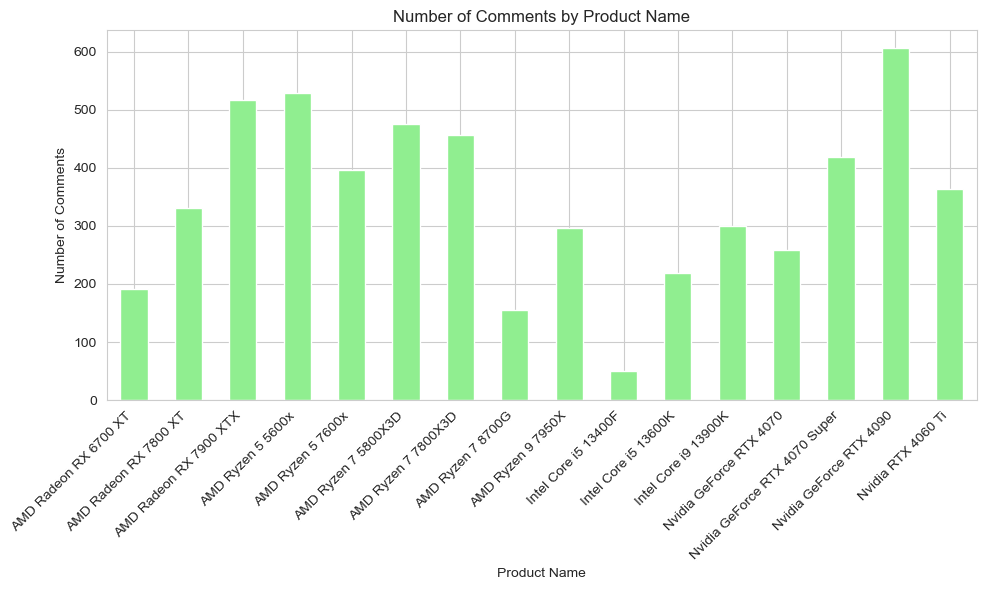

In [58]:
comments_by_category = comment_data.groupby('Product Name').size()
# Plot the bar chart
plt.figure(figsize=(10, 6))
comments_by_category.plot(kind='bar', color='lightgreen')
plt.title('Number of Comments by Product Name')
plt.xlabel('Product Name')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Timeline Plot of Post and Comments

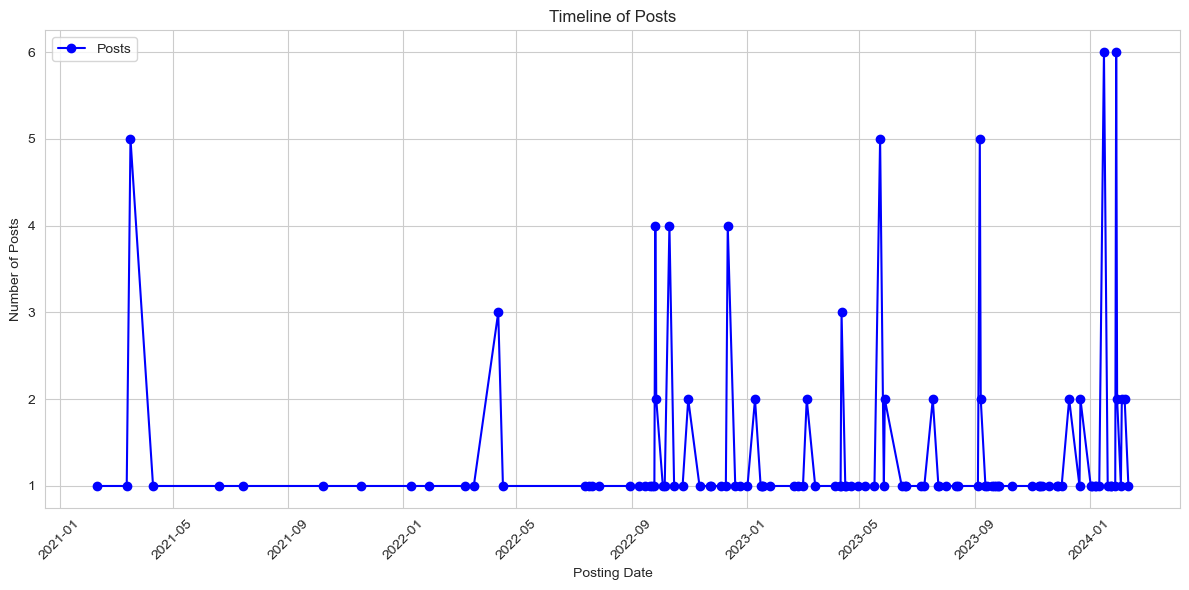

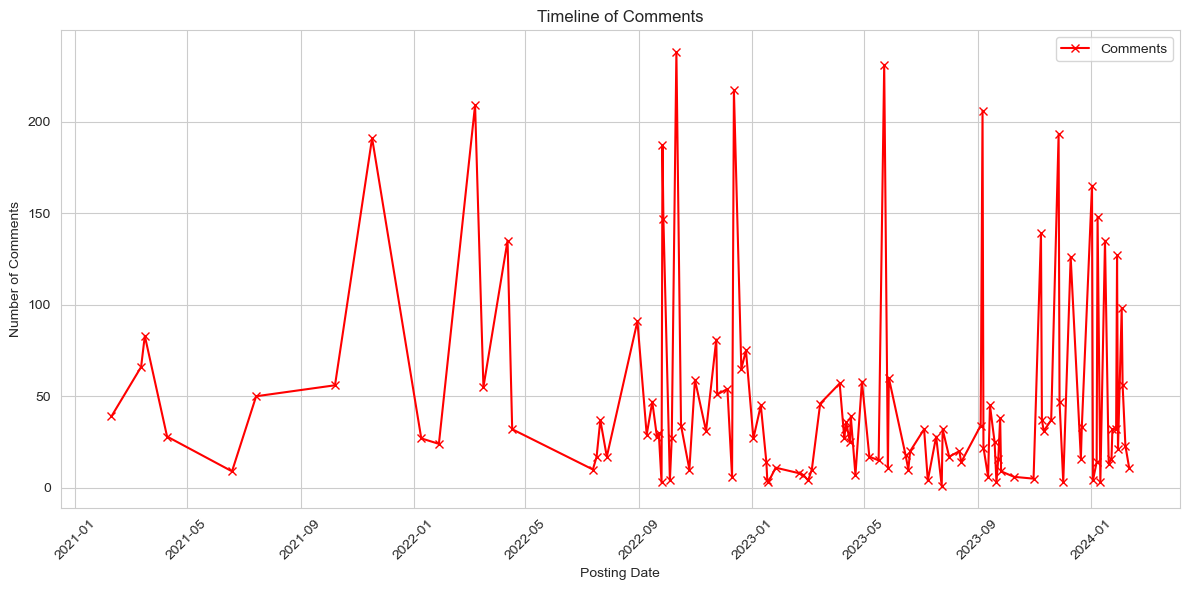

In [74]:
# Converting 'Posting Time' column to datetime
post_data['Posting Time'] = pd.to_datetime(post_data['Posting Time'])
comment_data['Posting Time'] = pd.to_datetime(comment_data['Posting Time'])

# Extracting date and count of posts
post_dates = post_data['Posting Time'].dt.date
post_counts = post_dates.value_counts().sort_index()

# Extracting date and count of comments
comment_dates = comment_data['Posting Time'].dt.date
comment_counts = comment_dates.value_counts().sort_index()

# Plotting timeline of posts
plt.figure(figsize=(12, 6))
plt.plot(post_counts.index, post_counts.values, color='blue', marker='o', linestyle='-', label='Posts')
plt.title('Timeline of Posts')
plt.xlabel('Posting Date')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting timeline of comments
plt.figure(figsize=(12, 6))
plt.plot(comment_counts.index, comment_counts.values, color='red', marker='x', linestyle='-', label='Comments')
plt.title('Timeline of Comments')
plt.xlabel('Posting Date')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Top Authors in post and comments Analysis 

In [68]:
post_counts = post_data['Author'].value_counts().drop('[deleted]').head(10)
comment_counts = comment_data['Author'].value_counts().drop('[deleted]').head(10)

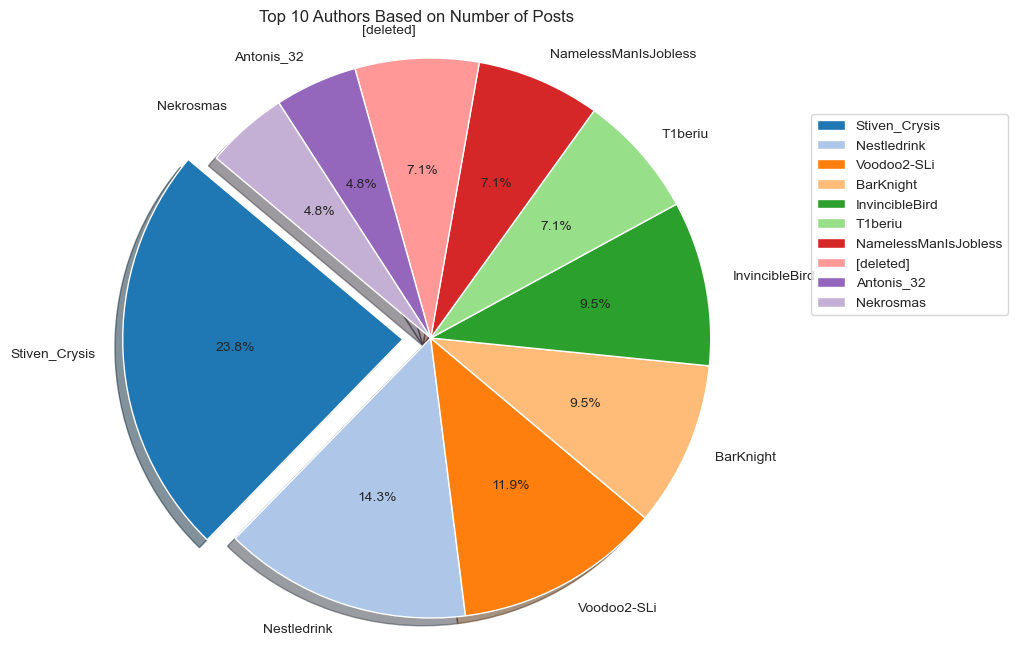

In [63]:
colors = plt.cm.tab20.colors[:len(post_counts)]

# Plotting top 10 authors based on posts using a pie chart
plt.figure(figsize=(10, 8))
plt.pie(post_counts, labels=post_counts.index, autopct='%1.1f%%', startangle=140,
        colors=colors, explode=[0.1] + [0] * (len(post_counts) - 1), shadow=True)
plt.title('Top 10 Authors Based on Number of Posts')
plt.axis('equal')
plt.legend(bbox_to_anchor=(1, 0.7), loc="center left")
plt.show()


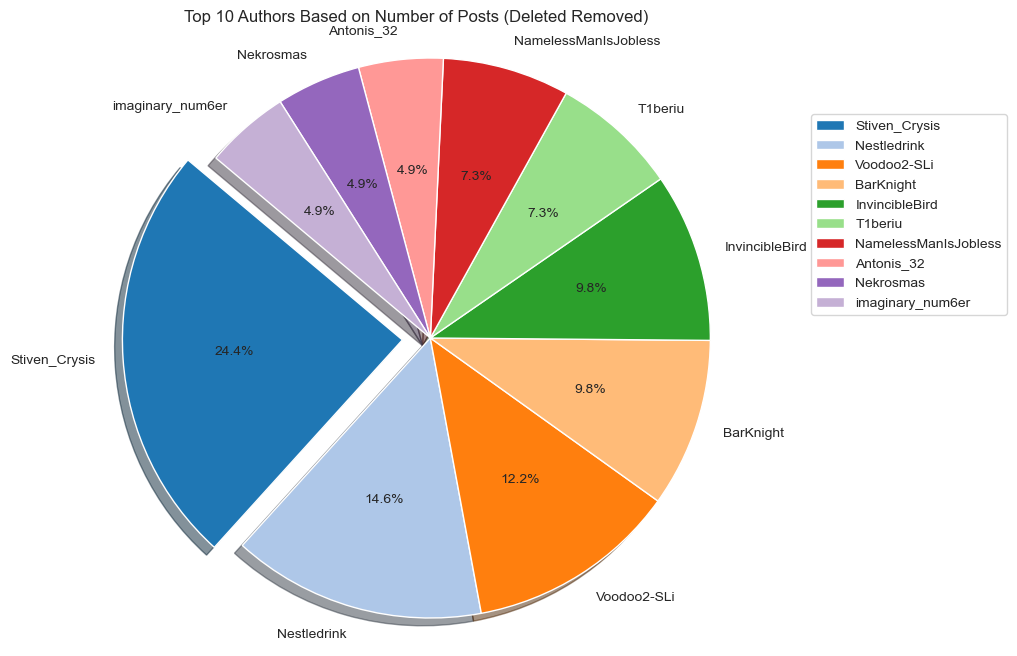

In [70]:
colors = plt.cm.tab20.colors[:len(post_counts)]

# Plotting top 10 authors based on posts using a pie chart
plt.figure(figsize=(10, 8))
plt.pie(post_counts, labels=post_counts.index, autopct='%1.1f%%', startangle=140,
        colors=colors, explode=[0.1] + [0] * (len(post_counts) - 1), shadow=True)
plt.title('Top 10 Authors Based on Number of Posts (Deleted Removed)')
plt.axis('equal')
plt.legend(bbox_to_anchor=(1, 0.7), loc="center left")
plt.show()

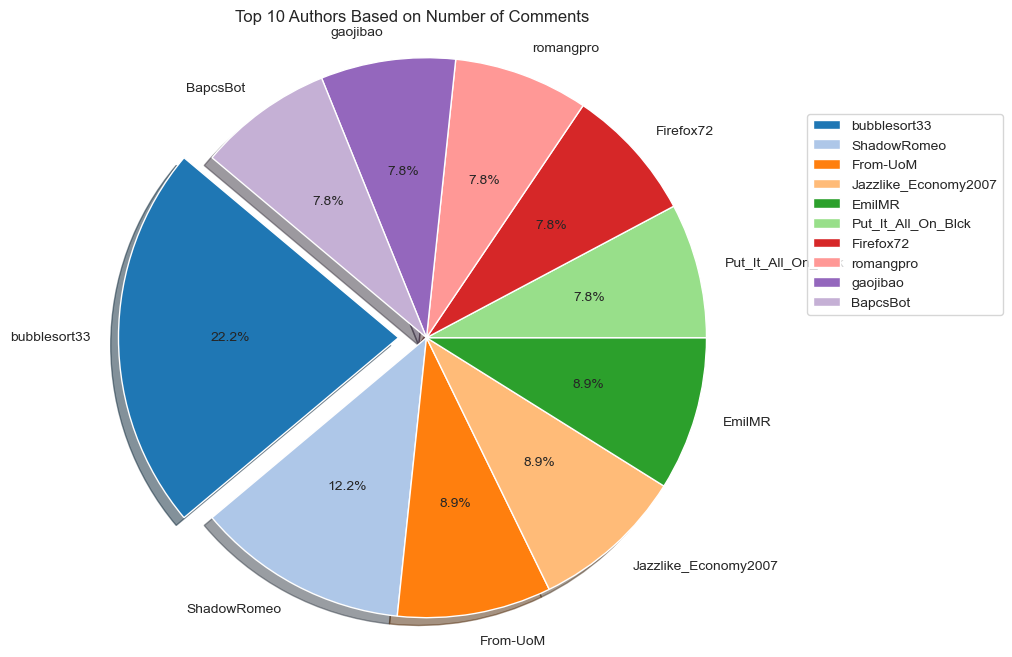

In [66]:
colors = plt.cm.tab20.colors[:len(comment_counts)]

# Plotting top 10 authors based on comments using a pie chart
plt.figure(figsize=(10, 8))
plt.pie(comment_counts, labels=comment_counts.index, autopct='%1.1f%%', startangle=140,
        colors=colors, explode=[0.1] + [0] * (len(comment_counts) - 1), shadow=True)
plt.title('Top 10 Authors Based on Number of Comments')
plt.axis('equal')

# Add legend
plt.legend(bbox_to_anchor=(1, 0.7), loc="center left")

plt.show()

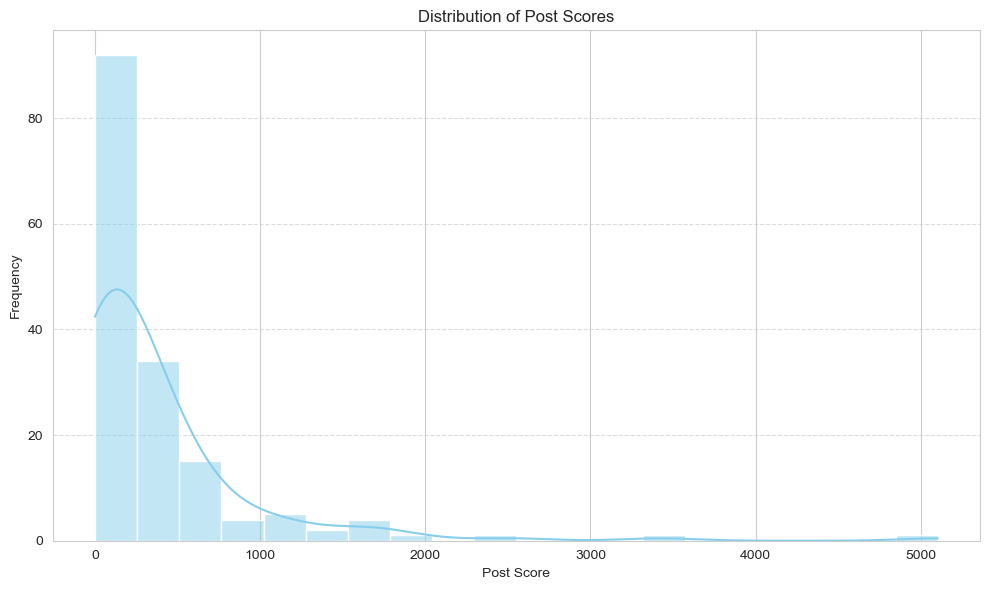

In [36]:
sns.set_style("whitegrid")

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(post_data['Score'], bins=20, color='skyblue', kde=True)
plt.title('Distribution of Post Scores')
plt.xlabel('Post Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

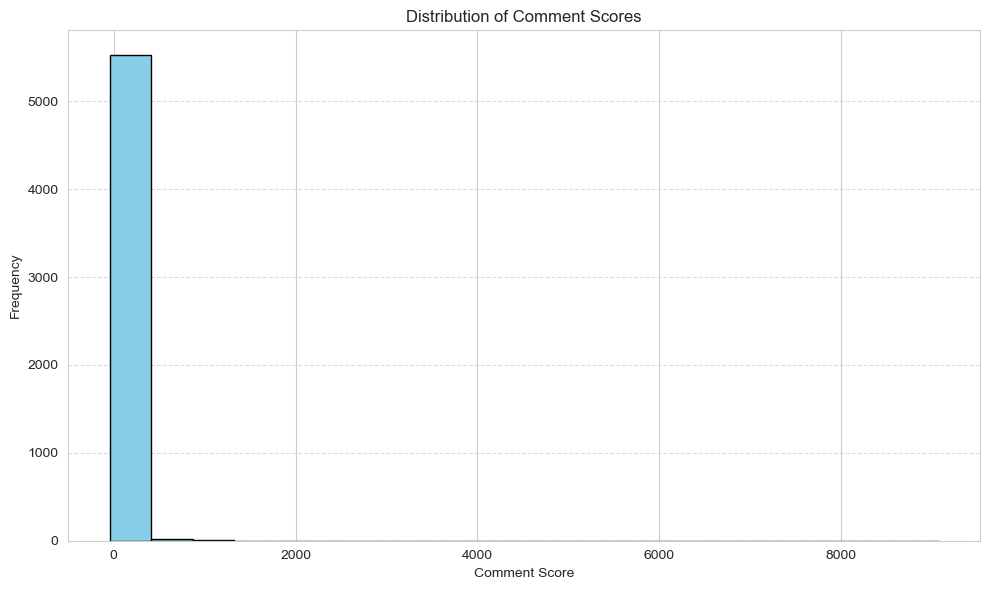

In [37]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(comment_data['Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Comment Scores')
plt.xlabel('Comment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

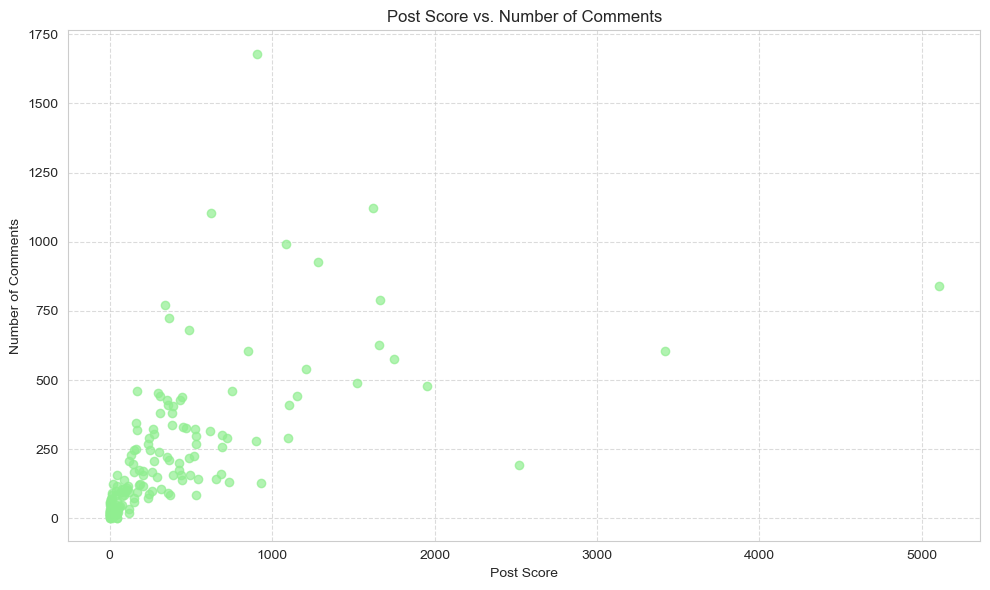

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(post_data['Score'], post_data['Number of Comments'], color='lightgreen', alpha=0.7)
plt.title('Post Score vs. Number of Comments')
plt.xlabel('Post Score')
plt.ylabel('Number of Comments')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

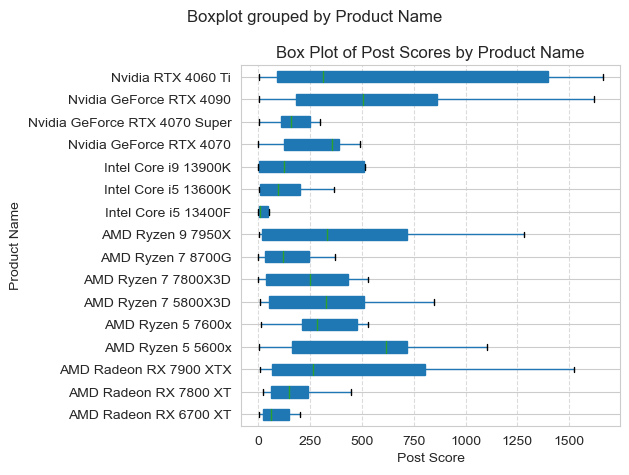

In [39]:
plt.figure(figsize=(10, 6))
post_data.boxplot(column='Score', by='Product Name', vert=False, patch_artist=True, showfliers=False)
plt.title('Box Plot of Post Scores by Product Name')
plt.xlabel('Post Score')
plt.ylabel('Product Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


## Word Clound for Posts and Comments on Reddit Posts

In [48]:
from wordcloud import WordCloud, STOPWORDS

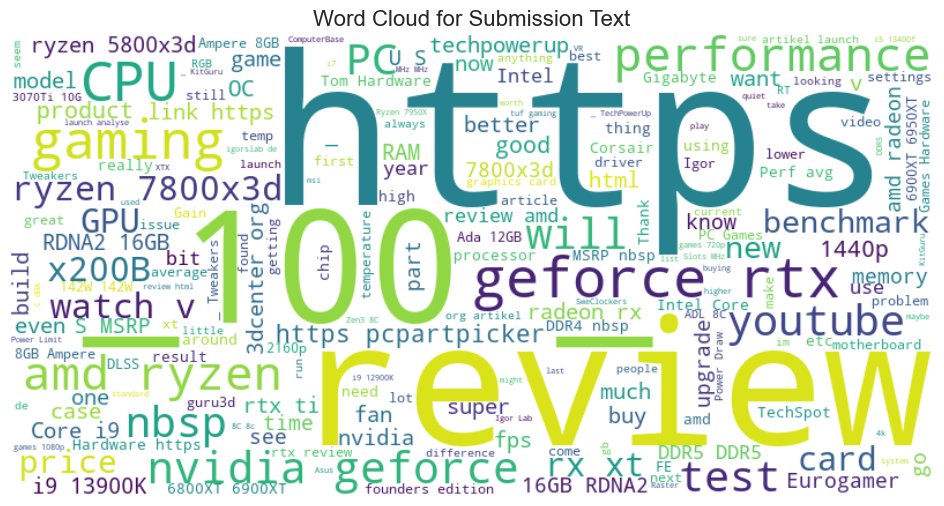

In [52]:
stopwords = set(STOPWORDS)

# Generate word cloud with customized parameters
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      max_words=200, stopwords=stopwords,
                      colormap='viridis', contour_color='steelblue',
                      contour_width=1).generate(submission_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Submission Text', fontsize=16)
plt.axis('off')
plt.show()


In [45]:
pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 8.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 34.0 MB/s eta 0:00:0000:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7
Note: you may need to restart the kernel to use updated packages.


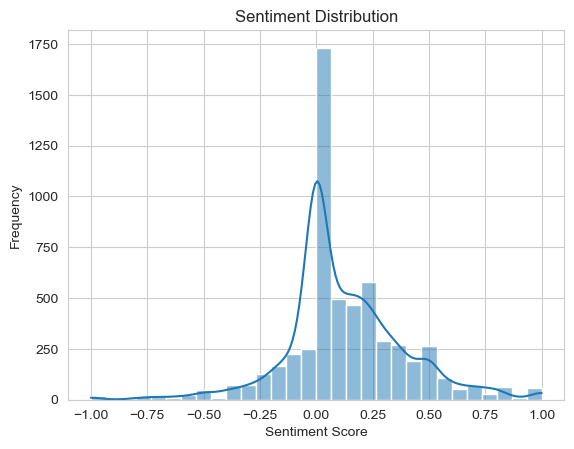

In [53]:
from textblob import TextBlob

# Perform sentiment analysis on 'Submission Text' and 'Comment Body' columns
post_data['Text Sentiment'] = post_data['Submission Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
comment_data['Text Sentiment'] = comment_data['Comment Body'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Concatenate post and comment data
all_data = pd.concat([post_data, comment_data])

# Visualize the sentiment distribution using a histogram
sns.histplot(all_data['Text Sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

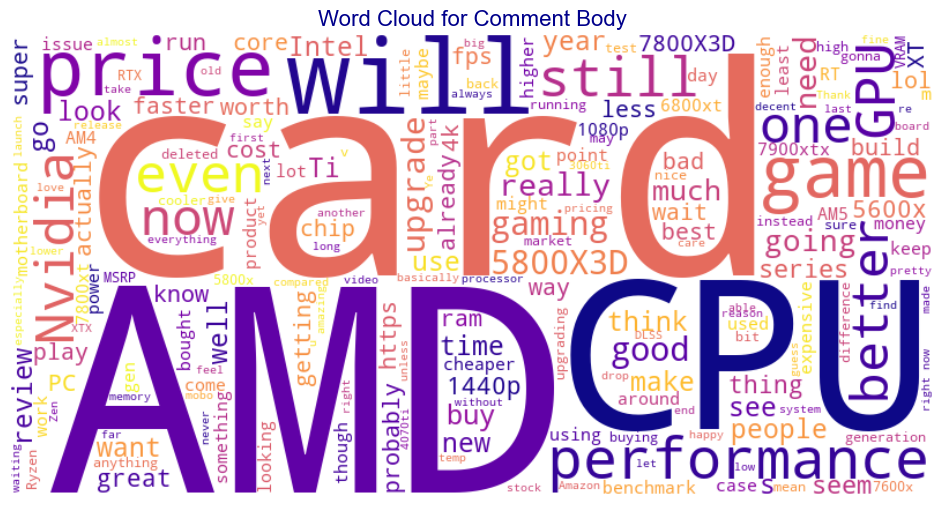

In [55]:
# Concatenating the comment bodies and remove any NaN values
comment_text = comment_data['Comment Body'].dropna().str.cat(sep=' ')

# Removing common stopwords
stopwords = set(STOPWORDS)

# Generate word cloud with customized parameters
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      max_words=200, stopwords=stopwords,
                      colormap='plasma', contour_color='darkred',
                      contour_width=2).generate(comment_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Comment Body', fontsize=16, color='darkblue')
plt.axis('off')
plt.show()